# Part 4: Choose your own adventure!

For this, we will be exploring word frequency over time to answer the question: does the frequency of certain words change over time?

We will be starting with four common words that have been referenced in almost every single debate or speech I've ever listened to, which I am sure you have heard as well: `["freedom", "economy", "security", "health"]`

In [1]:
# Define words we think are important in this case
import pandas as pd
import re
from matplotlib import pyplot as plt

sou = pd.read_csv('data/SOTU.csv')
words = ["freedom", "economy", "security", "health"]

In [2]:
def count_word(text, word):
    """
    RegEx Method to find variations of the word (case insensitive)
    """
    pattern = r'\b' + re.escape(word) + r'\b'
    return len(re.findall(pattern, text, flags=re.IGNORECASE))


In [3]:
# Iterate through every word and get the raw count per year and then scale it
for w in words:
    raw_col = f"freq_{w}"
    rel_col = f"rel_freq_{w}"
    sou[raw_col] = sou["Text"].apply(lambda x: count_word(x, w))
    sou[rel_col] = sou[raw_col] / sou["Word Count"] * 1000


In [4]:
# Sort the values every year
sou_sorted = sou.sort_values("Year").reset_index(drop=True)

# Iterate through the words and fit a rolling average
for w in words:
    col = f"rel_freq_{w}"
    sou_sorted[col + "_smooth"] = (
        sou_sorted[col].rolling(window=10, min_periods=3).mean()
    )


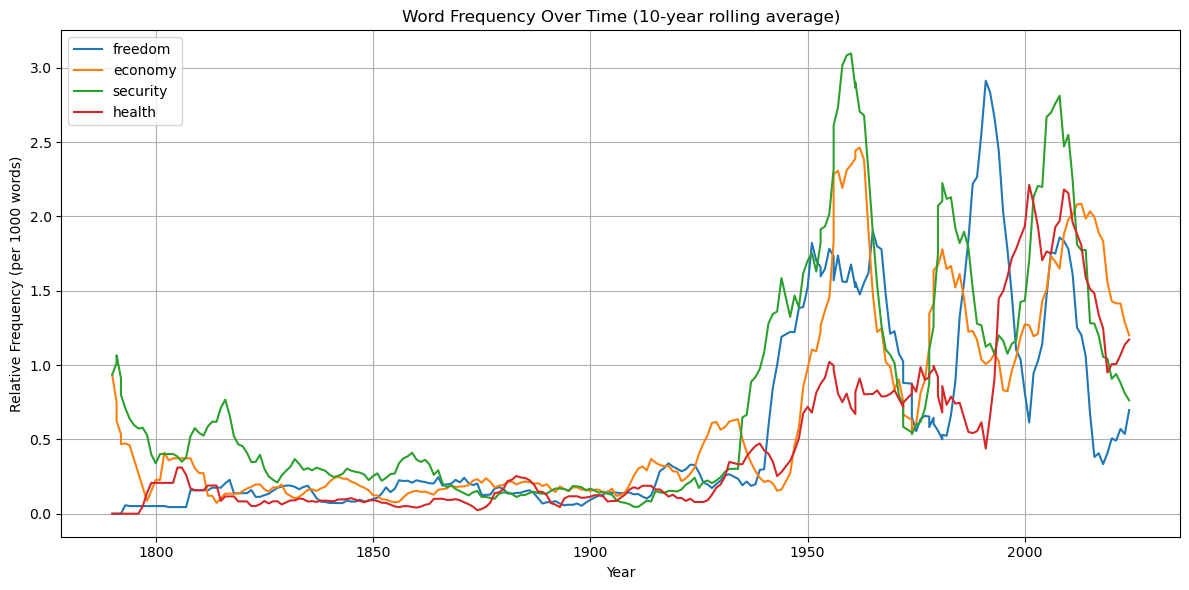

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(12, 6))

# Plot for the respective years
for w in words:
    plt.plot(
        sou_sorted["Year"],
        sou_sorted[f"rel_freq_{w}_smooth"],
        label=w
    )

plt.title("Word Frequency Over Time (10-year rolling average)")
plt.xlabel("Year")
plt.ylabel("Relative Frequency (per 1000 words)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("outputs/word_freq_over_time.png")

#### Freedom

Mentions of freedom stay low throughout the 1800s, then gradually increase in the early 20th century. The term spikes sharply during the Cold War (1970s–1990s), when U.S. presidents frequently framed politics in ideological terms. Another noticeable peak appears in the early 2000s during the post-9/11 era, when “freedom” became central to national messaging. Through time, “freedom” becomes a major rhetorical theme primarily in the modern era.

#### Economy

The word economy remains rarely used before 1900, but rises significantly during major economic crises. There are clear peaks during the Great Depression (1930s), post-WWII recovery, the stagflation era (1970s), and again around the Great Recession (2008–2010). The pattern reflects how presidents address economic instability directly in their State of the Union speeches.

#### Security

Security shows the strongest spikes of any word. Usage jumps dramatically during World War II, peaks again throughout the Cold War, and rises once more after 2001 in response to terrorism and national security concerns. This term closely tracks periods when the nation faces real or perceived threats, making it the most crisis-driven word in the group.

#### Health

Mentions of health are almost nonexistent before the 20th century. Use rises steadily as the federal government becomes more involved in public health policy—especially around the creation of Medicare and Medicaid (1960s), health reform debates in the 1990s, the Affordable Care Act period (2009–2015), and again around 2020 during the COVID-19 pandemic. “Health” is the newest major theme in modern SOTU speeches.

#### Overall Summary

Across all four words, usage stays low before 1900 and rises sharply in the modern era as speeches become more policy-focused. The trends reveal how presidential priorities evolve: “security” peaks during wars and threats, “economy” during financial crises, “freedom” during ideological conflicts, and “health” during healthcare policy shifts and pandemics. Together, these patterns highlight how State of the Union language reflects broad historical changes in national concerns.